In [59]:
import matplotlib.pyplot as plt
from cycler import cycler
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import matplotlib.patheffects as pe
import numpy as np
%matplotlib inline

In [104]:
#ML Imports
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
import keras

In [5]:
# import jtplot submodule from jupyterthemes

# currently installed theme will be used to
# jtplot.style('matt')
AllFontSize=18

colors=['#4878CF', '#6ACC65', '#D65F5F', '#C4AD66','#77BEDB', '#B47CC7','gray','#98b5f4','#fd97ee','#a30063']
colors_new=cycler(color=['#4878CF', '#6ACC65', '#D65F5F', '#C4AD66','#77BEDB', '#B47CC7','gray','#98b5f4','#fd97ee','#a30063'])

plt.rcParams['axes.prop_cycle'] = colors_new
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.labelsize'] = AllFontSize
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['axes.grid']=True
plt.rcParams['axes.titlesize'] = AllFontSize
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 1
plt.rcParams['legend.fontsize'] = AllFontSize
plt.rcParams['legend.frameon'] = False 
plt.rcParams['xtick.labelsize'] = AllFontSize
plt.rcParams['ytick.labelsize'] = AllFontSize
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=False
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.size']=2
plt.rcParams['ytick.minor.size']=2
plt.rcParams['savefig.bbox']='tight'
plt.rcParams['font.sans-serif'] = "CMU Sans Serif"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['mathtext.fontset'] = 'cm' 

# Data Manipulation and Preprocessing

In [6]:
# class Model:
#     def __init__(self,):
        
def ImportData(directory):
    #IMPORTING DATA FROM SENSOR FILES
    #THERE ARE TWO FILES - ONE WITH PREFIX A AND ONE WITH PREFIX B
    Folder=directory
    FileNames=[Name for Name in listdir(Folder) if not Name[0] == '.']
    
    #INITIALIZING SEPARATE DATA DICT FOR DIFFERENT FILE TYPES
    AllDataA={}
    AllDataB={}
    
    #DIFFERENT CHANNELS COMMING IN FOR DIFFERENT FILES
    aHeaders=['TA','C1','C3','C5','F2','F4','F6','F8','F10']
    bHeaders=['TB','C2','C4','P','F1','F3','F5','F7','F9']
    #COMBINING ALL CHANNELS
    allHeaders=aHeaders+bHeaders
    for Name in FileNames:
        print("Successfully Imported File:",Name)
        RunName=Name.split('.')[0].split('_')[0]
        RunType=Name.split('.')[0].split('_')[1]
        #CREATING THE SEPARATE LISTS FOR THE DIFFERENT INCOMING FILES
        if RunType=='a':
            AllDataA[RunName]=pd.read_csv(Folder+Name,names=aHeaders).astype(float)
        if RunType=='b':
            AllDataB[RunName]=pd.read_csv(Folder+Name,names=bHeaders).astype(float)
    #RETURNING THE SEPARATE LISTS FOR THE A&B FILES
    return AllDataA,AllDataB

DataA,DataB=ImportData('2019-05-06_FirstTrialData/')

Successfully Imported File: apple_a.csv
Successfully Imported File: apple_b.csv
Successfully Imported File: idk_a.csv
Successfully Imported File: idk_b.csv
Successfully Imported File: k1p1_a.csv
Successfully Imported File: k1p1_b.csv
Successfully Imported File: k1p5_a.csv
Successfully Imported File: k1p5_b.csv
Successfully Imported File: k1_a.csv
Successfully Imported File: k1_b.csv
Successfully Imported File: k2_a.csv
Successfully Imported File: k2_b.csv
Successfully Imported File: nothing_a.csv
Successfully Imported File: nothing_b.csv
Successfully Imported File: WoodBall_a.csv
Successfully Imported File: WoodBall_b.csv


In [7]:
def MergeAandBData(AllDataA,AllDataB):
    Data={}
    for key in AllDataA.keys():
        Data[key]=pd.merge(AllDataA[key],AllDataB[key],left_index=True, right_index=True, how='inner')
    return Data
Data=MergeAandBData(DataA,DataB)

## Data Vizualization /EDA

/n/home12/fernandes/.conda/envs/PythonGPU/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/n/home12/fernandes/.conda/envs/PythonGPU/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


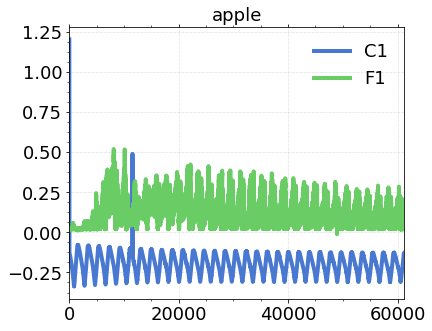

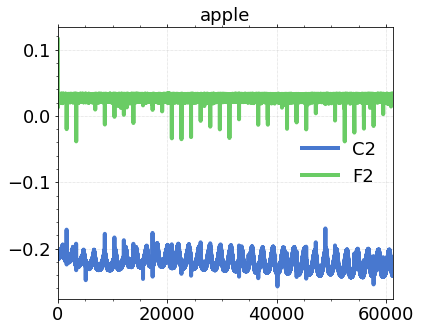

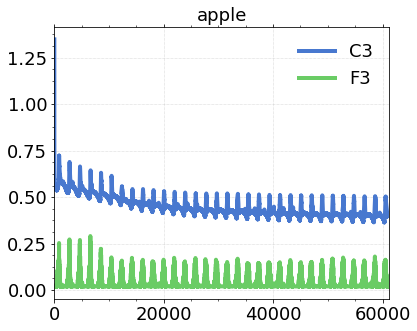

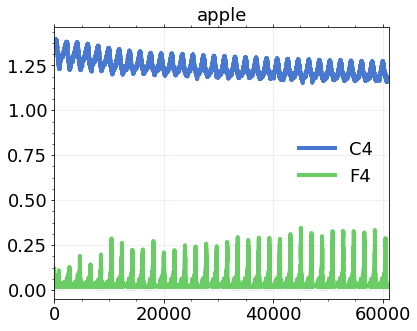

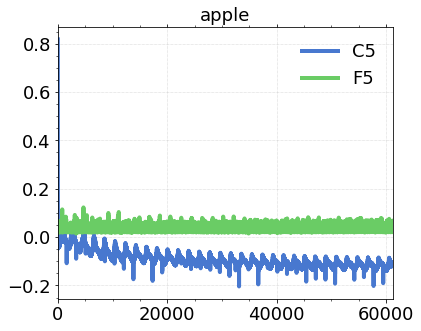

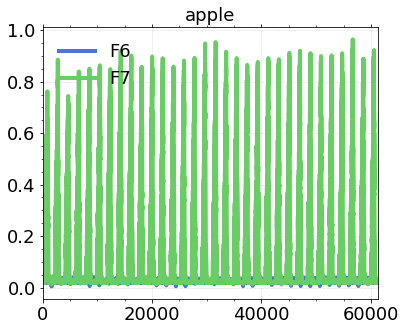

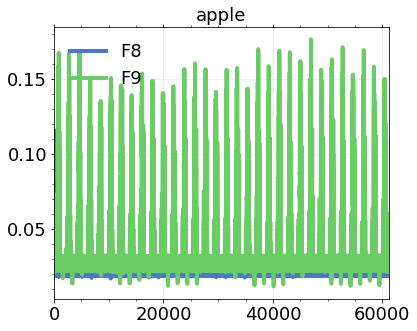

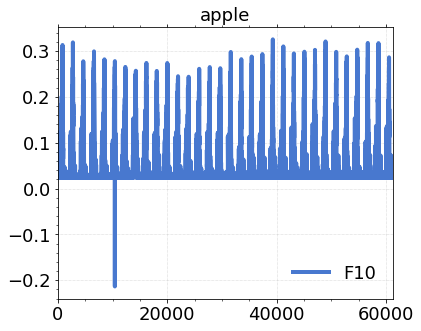

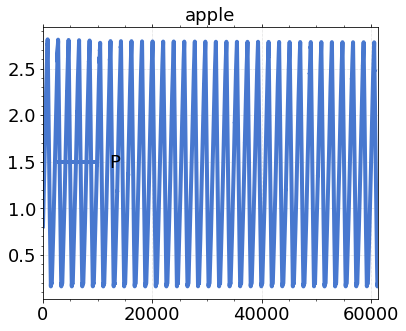

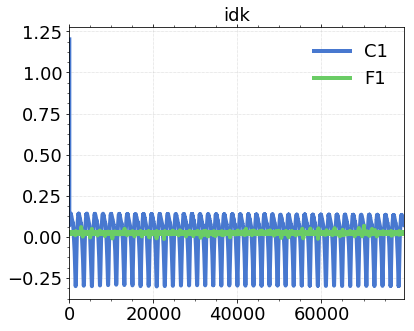

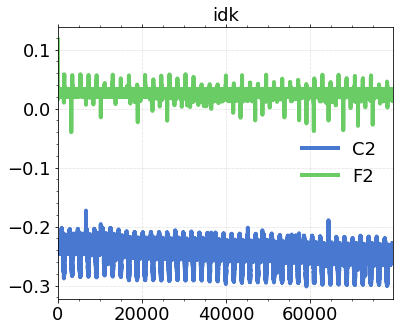

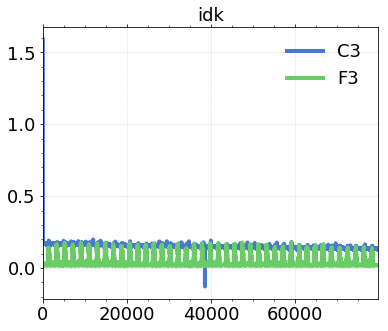

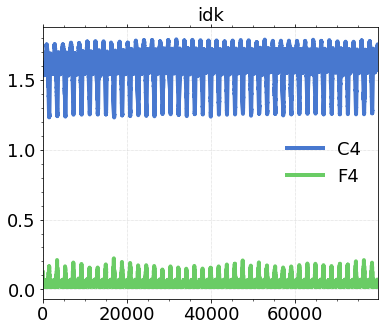

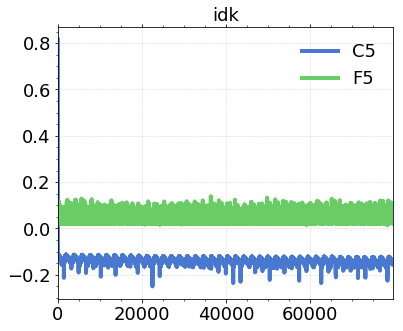

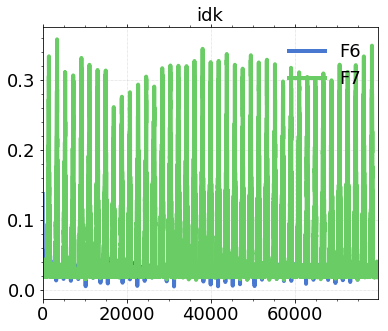

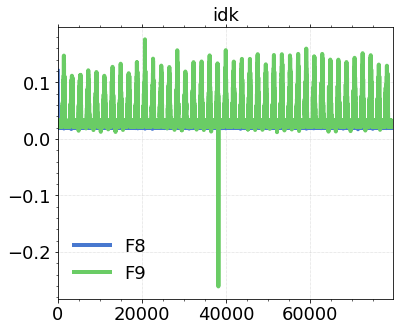

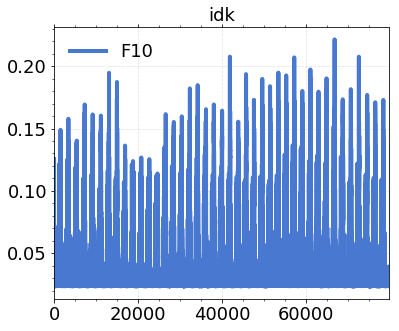

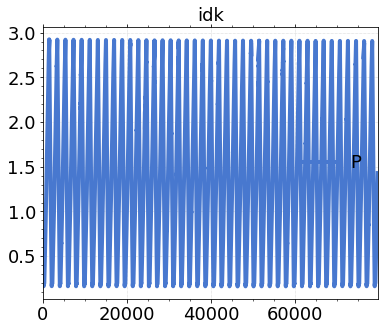

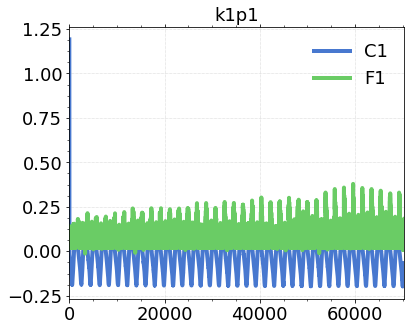

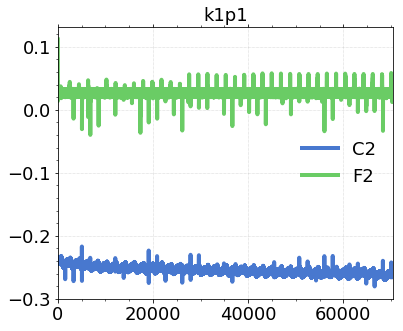

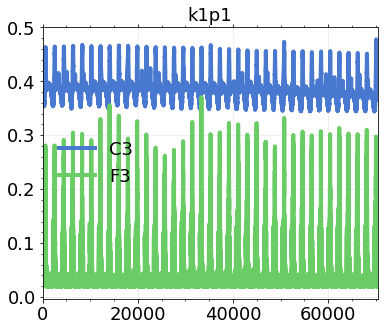

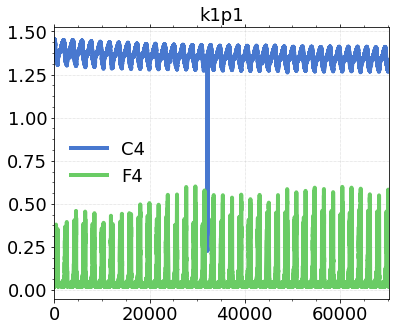

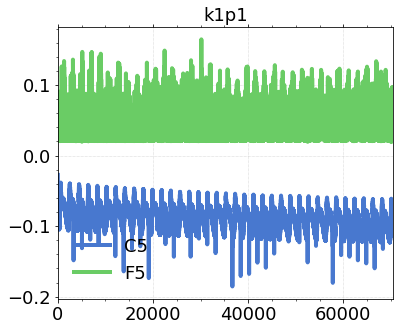

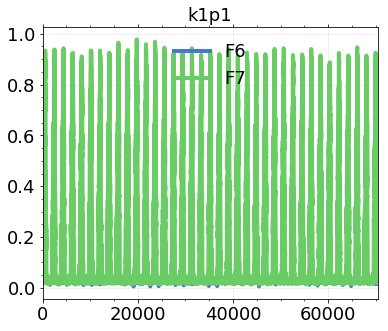

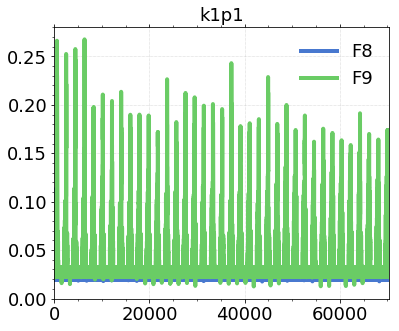

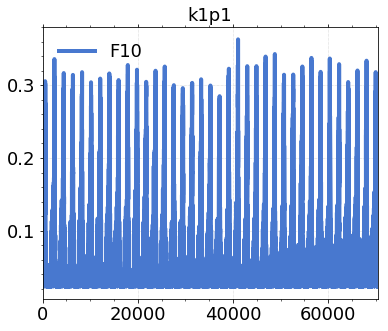

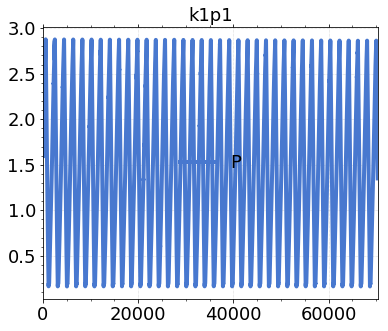

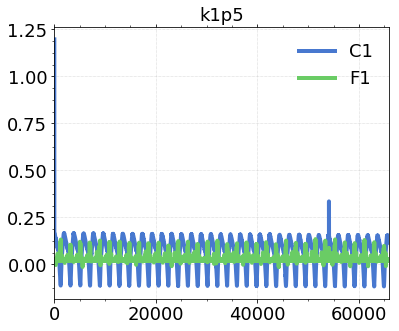

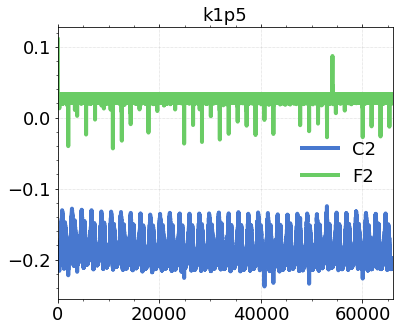

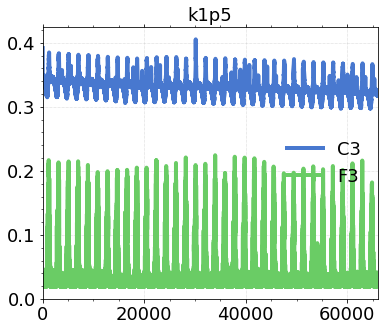

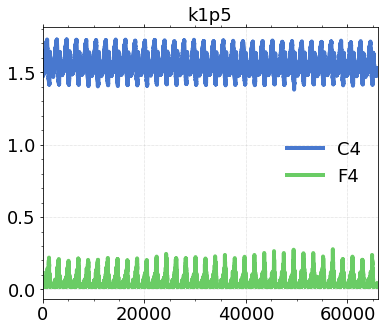

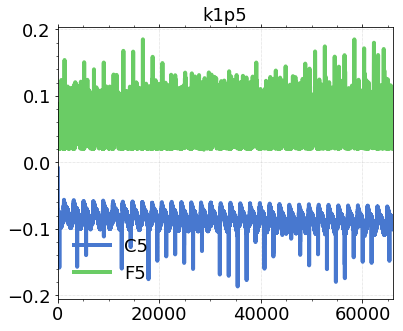

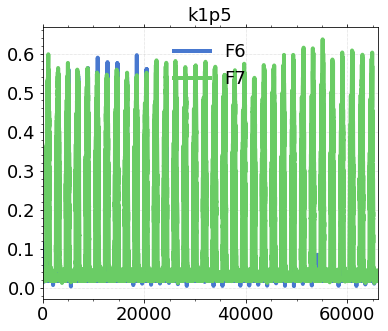

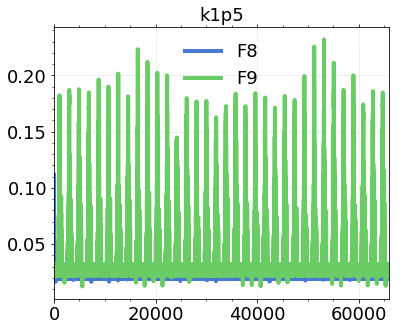

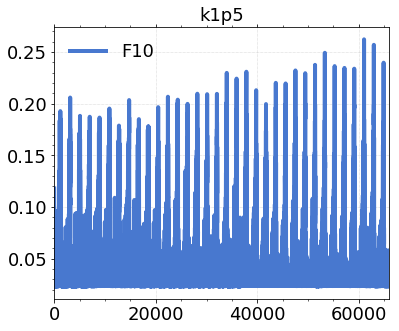

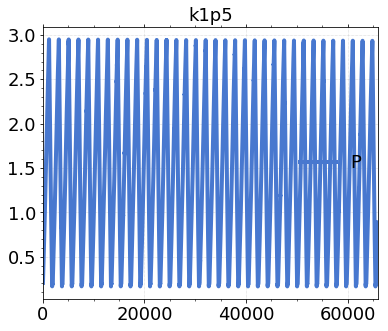

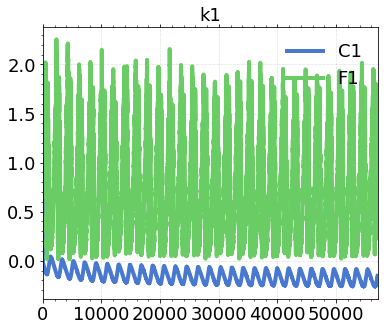

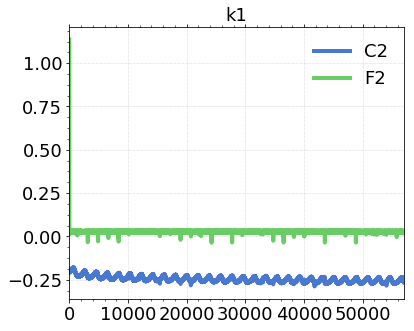

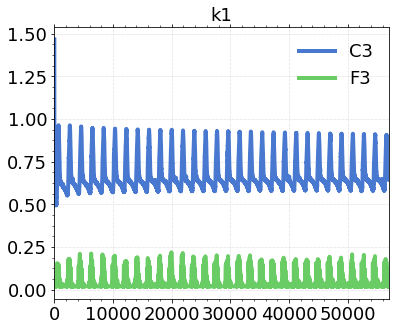

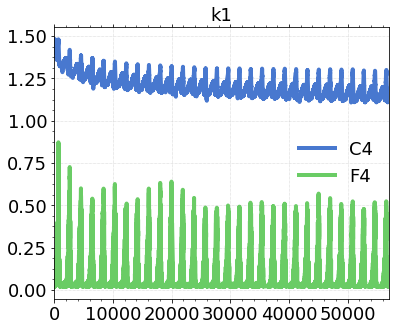

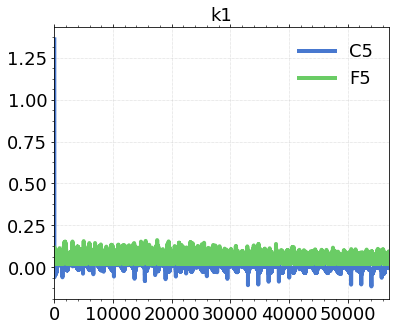

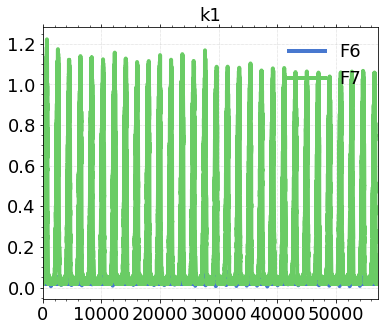

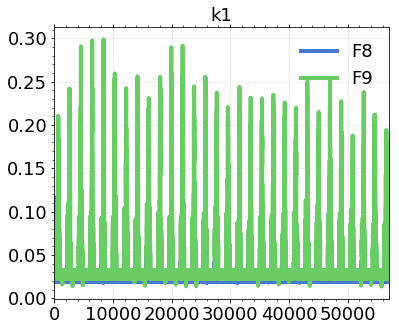

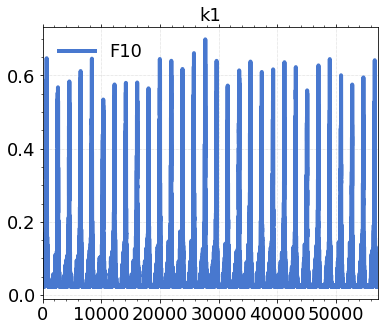

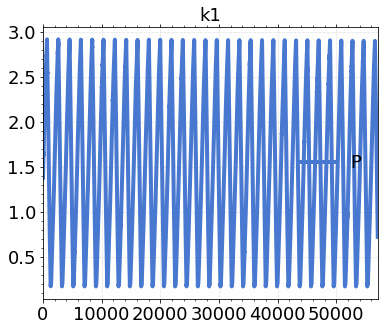

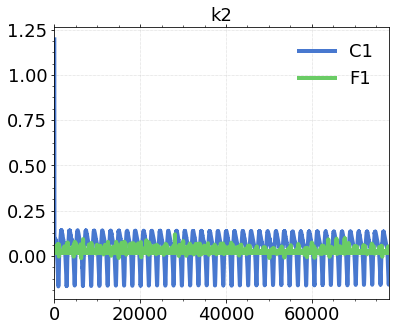

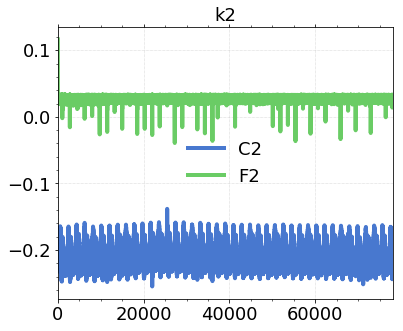

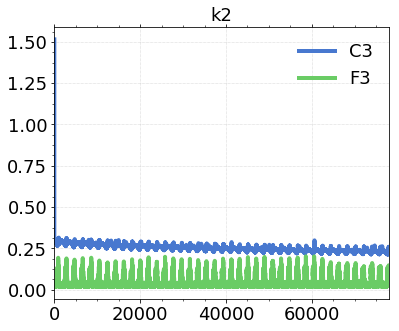

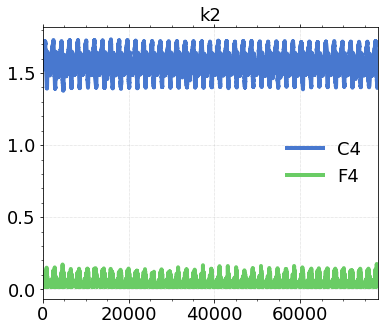

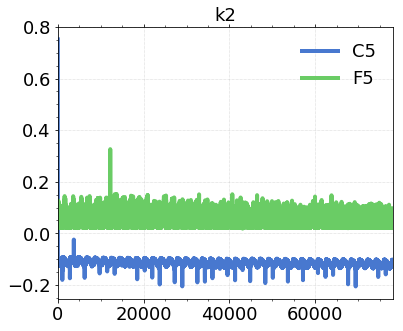

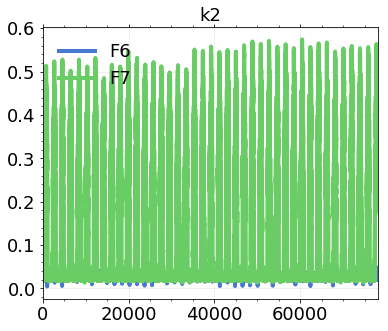

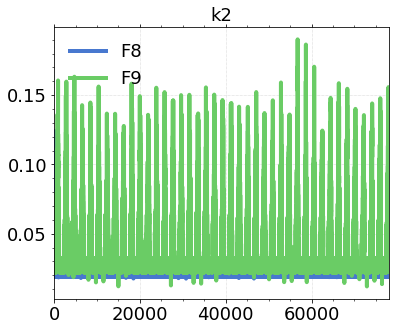

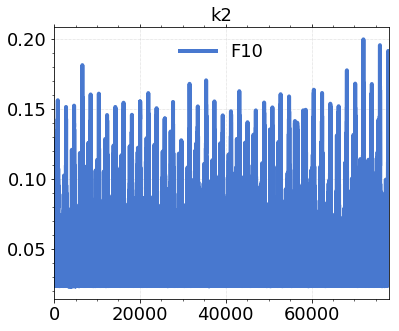

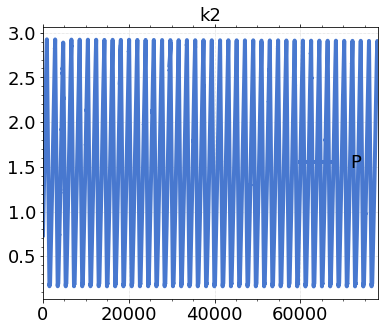

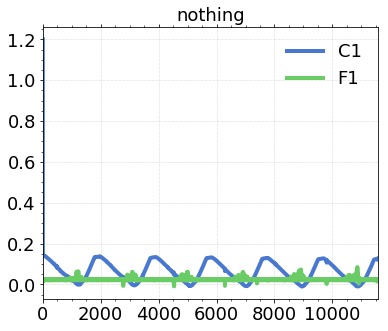

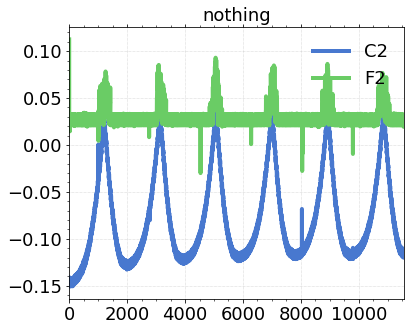

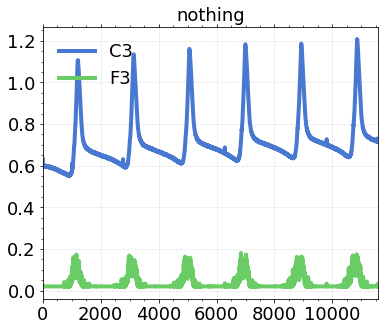

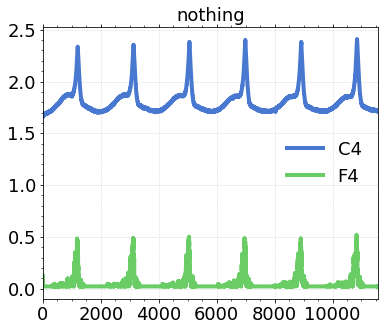

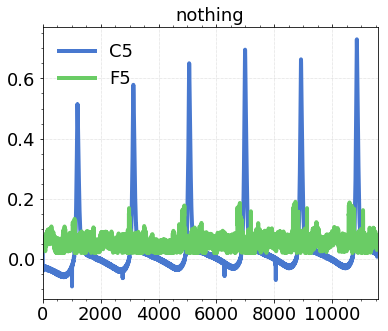

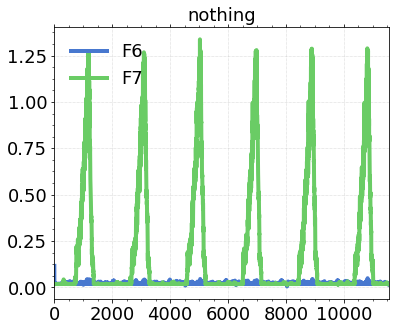

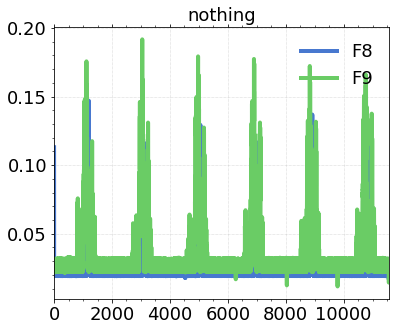

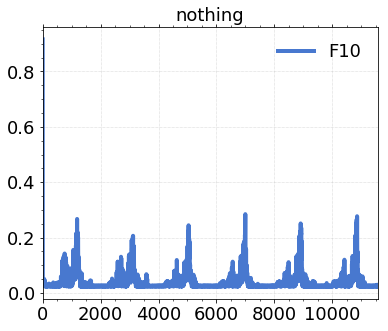

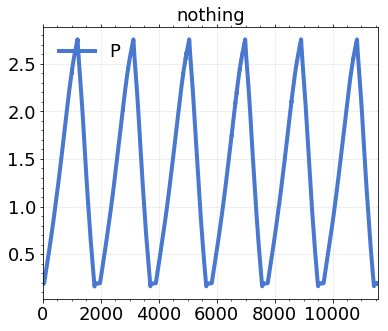

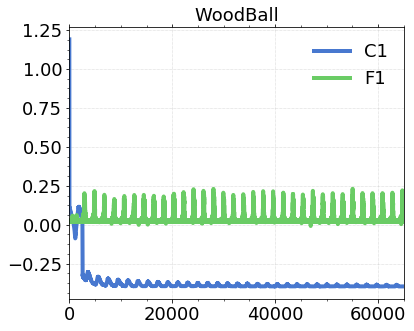

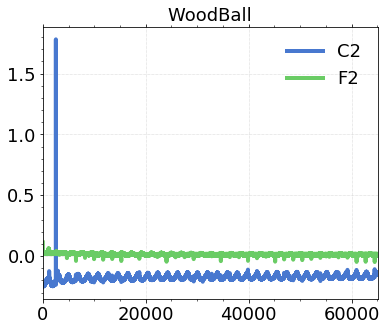

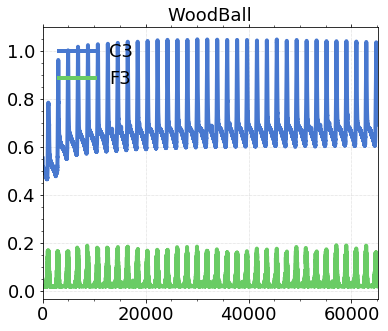

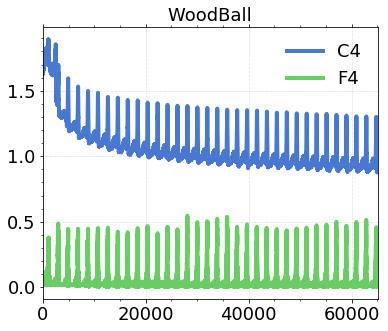

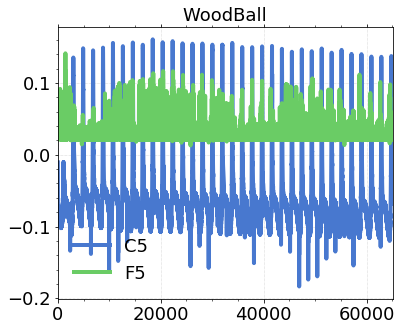

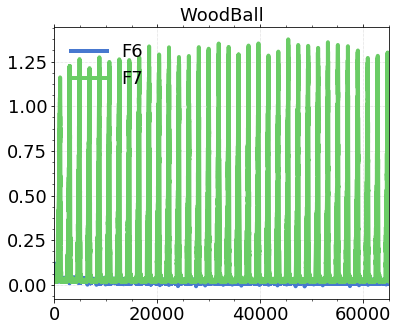

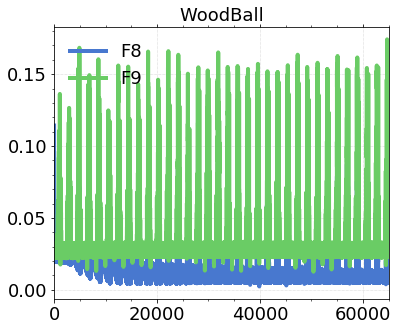

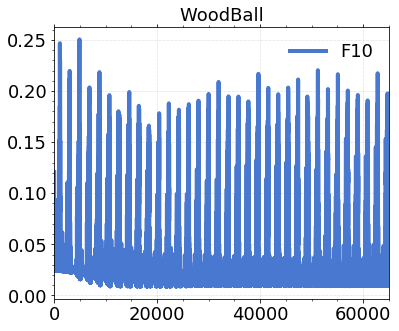

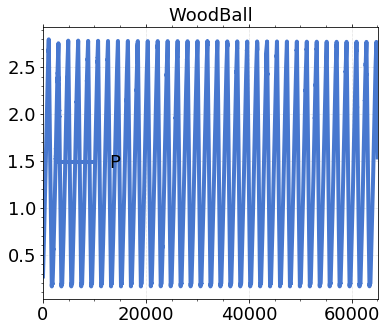

In [8]:
for key in Data.keys():
    Data[key].plot(y=['C1','F1'])
    plt.title(key)
    Data[key].plot(y=['C2','F2'])
    plt.title(key)
    Data[key].plot(y=['C3','F3'])
    plt.title(key)
    Data[key].plot(y=['C4','F4'])
    plt.title(key)
    Data[key].plot(y=['C5','F5'])
    plt.title(key)
    Data[key].plot(y=['F6','F7'])
    plt.title(key)
    Data[key].plot(y=['F8','F9'])
    plt.title(key)
    Data[key].plot(y=['F10'])
    plt.title(key)
    Data[key].plot(y=['P'])
    plt.title(key)

## Feature manpulation and Multinomial classification target generation

In [9]:
def EmbedLabels(AllData):
    EmbededData=pd.DataFrame()
    for key in AllData.keys():
        AllData[key]['value']=key
    EmbededData=pd.concat(AllData,ignore_index=True)    
    return EmbededData

# def TrainTestSets(AllData,TrainPercent):
EmbededData=EmbedLabels(Data)
EmbededData.head(100000)

,TA,C1,C3,C5,F2,F4,F6,F8,F10,TB,C2,C4,P,F1,F3,F5,F7,F9,value
0,0.010918,1.190621,0.552517,-0.010595,0.112779,0.116251,0.117677,0.114301,0.120666,0.029132,-0.247143,1.634803,0.268921,0.020386,0.020094,0.053644,0.018935,0.027371,WoodBall
1,0.046850,0.114397,0.515252,-0.074073,0.021446,0.020973,0.020311,0.020518,0.024131,0.073010,-0.243323,1.641114,0.271736,0.020344,0.020079,0.029890,0.018563,0.022824,WoodBall
2,0.090318,0.114280,0.514817,-0.074455,0.021108,0.020847,0.020741,0.019383,0.024021,0.107605,-0.243562,1.642023,0.273940,0.020243,0.020128,0.041688,0.017637,0.022431,WoodBall
3,0.124876,0.114133,0.514773,-0.077019,0.021150,0.020897,0.024149,0.019408,0.024030,0.142129,-0.243804,1.642759,0.276072,0.020194,0.020143,0.045510,0.018590,0.022862,WoodBall
4,0.159718,0.113588,0.512708,-0.078339,0.021279,0.020897,0.024392,0.019380,0.025226,0.177050,-0.244210,1.635197,0.278111,0.020467,0.020120,0.044806,0.018641,0.032005,WoodBall
5,0.194317,0.113864,0.512389,-0.076362,0.021468,0.020958,0.021387,0.020190,0.026794,0.211560,-0.247864,1.636737,0.280000,0.018948,0.020894,0.045895,0.018898,0.030347,WoodBall
6,0.228812,0.113661,0.510829,-0.074600,0.021368,0.020967,0.020690,0.022299,0.025308,0.246075,-0.247546,1.623881,0.280955,0.016350,0.020824,0.061035,0.018477,0.025263,WoodBall
7,0.263320,0.113541,0.514770,-0.074288,0.021435,0.020949,0.020327,0.020682,0.024125,0.280597,-0.244913,1.640676,0.284044,0.020443,0.020501,0.062547,0.018654,0.022906,WoodBall
8,0.298414,0.113294,0.514532,-0.074284,0.019882,0.021349,0.019868,0.019581,0.024016,0.315638,-0.243443,1.641899,0.286465,0.025223,0.020154,0.048429,0.018567,0.022297,WoodBall
9,0.332858,0.112783,0.513926,-0.075245,0.028295,0.021135,0.020246,0.019420,0.024041,0.350260,-0.243407,1.641576,0.287974,0.019415,0.022237,0.043951,0.017547,0.022870,WoodBall


In [10]:
def RemoveFeatures(Data,FeatureList):
    DataRemoved=Data.drop(FeatureList,axis=1)
    return DataRemoved

EmbededDataRemoved=RemoveFeatures(EmbededData,['TA','TB'])
EmbededDataRemoved.head()

,C1,C3,C5,F2,F4,F6,F8,F10,C2,C4,P,F1,F3,F5,F7,F9,value
0,1.190621,0.552517,-0.010595,0.112779,0.116251,0.117677,0.114301,0.120666,-0.247143,1.634803,0.268921,0.020386,0.020094,0.053644,0.018935,0.027371,WoodBall
1,0.114397,0.515252,-0.074073,0.021446,0.020973,0.020311,0.020518,0.024131,-0.243323,1.641114,0.271736,0.020344,0.020079,0.029890,0.018563,0.022824,WoodBall
2,0.114280,0.514817,-0.074455,0.021108,0.020847,0.020741,0.019383,0.024021,-0.243562,1.642023,0.273940,0.020243,0.020128,0.041688,0.017637,0.022431,WoodBall
3,0.114133,0.514773,-0.077019,0.021150,0.020897,0.024149,0.019408,0.024030,-0.243804,1.642759,0.276072,0.020194,0.020143,0.045510,0.018590,0.022862,WoodBall
4,0.113588,0.512708,-0.078339,0.021279,0.020897,0.024392,0.019380,0.025226,-0.244210,1.635197,0.278111,0.020467,0.020120,0.044806,0.018641,0.032005,WoodBall


In [11]:
print(EmbededDataRemoved.head())
def StringToNumber(Data,Key):
    # just run this once. This function alters the original data and does not copy into a new dataset
    values=Data[Key].unique()
    i=0
    print(values)
    for name in values:
        print(name)
        Data[Key] = Data[Key].mask(Data[Key] == name, i)
        print(i)
        i+=1
StringToNumber(EmbededDataRemoved,'value')

         C1        C3        C5        F2        F4        F6        F8  \
0  1.190621  0.552517 -0.010595  0.112779  0.116251  0.117677  0.114301   
1  0.114397  0.515252 -0.074073  0.021446  0.020973  0.020311  0.020518   
2  0.114280  0.514817 -0.074455  0.021108  0.020847  0.020741  0.019383   
3  0.114133  0.514773 -0.077019  0.021150  0.020897  0.024149  0.019408   
4  0.113588  0.512708 -0.078339  0.021279  0.020897  0.024392  0.019380   

        F10        C2        C4         P        F1        F3        F5  \
0  0.120666 -0.247143  1.634803  0.268921  0.020386  0.020094  0.053644   
1  0.024131 -0.243323  1.641114  0.271736  0.020344  0.020079  0.029890   
2  0.024021 -0.243562  1.642023  0.273940  0.020243  0.020128  0.041688   
3  0.024030 -0.243804  1.642759  0.276072  0.020194  0.020143  0.045510   
4  0.025226 -0.244210  1.635197  0.278111  0.020467  0.020120  0.044806   

         F7        F9     value  
0  0.018935  0.027371  WoodBall  
1  0.018563  0.022824  WoodBal

In [16]:
from sklearn.model_selection import train_test_split
def XYSplit(Data,YKey):
    xKey=[ x for x in Data.keys() if x is not YKey ]
    yData=Data[YKey]
    xData=Data[xKey]
    return xData,yData
xData,yData=XYSplit(EmbededDataRemoved,'value')

def TrainTestSeparator(xData,yData,percentTrain):
    X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size=1-percentTrain/100., random_state=42)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test=TrainTestSeparator(xData,yData,10)    

# Classification

## Doing Some Preliminary NN Using Keras

In [96]:
print(X_train.shape)
print(y_train.shape)

(48887, 16)
(48887,)


In [116]:
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1',
 '/job:localhost/replica:0/task:0/device:GPU:2',
 '/job:localhost/replica:0/task:0/device:GPU:3']

In [137]:
# fix a width that is suited for visualizing the output of hidden layers
H = 50
input_dim = X_train.shape[1]

# create sequential multi-layer perceptron
model = Sequential()
#layer 0
model.add(Dense(H, input_dim=input_dim, activation='tanh')) 
#layer 1
# model.add(Dense(H, activation='tanh'))
#layer 2
# model.add(Dense(H, activation='tanh'))
# #layer 3
# model.add(Dense(H, activation='tanh'))
# #layer 4
# model.add(Dense(H, activation='tanh'))
# #layer 5
# model.add(Dense(H, activation='tanh'))
#binary classification, one output
model.add(Dense(8, activation='sigmoid')) 

# configure the model
model.compile(optimizer='AdaDelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 50)                850       
_________________________________________________________________
dense_51 (Dense)             (None, 8)                 408       
Total params: 1,258
Trainable params: 1,258
Non-trainable params: 0
_________________________________________________________________


In [131]:
y_train_OH=OneHotEncoder(sparse=False).fit_transform(y_train.values.reshape(-1, 1))
y_test_OH=OneHotEncoder(sparse=False).fit_transform(y_test.values.reshape(-1, 1))

/n/home12/fernandes/.conda/envs/PythonGPU/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/n/home12/fernandes/.conda/envs/PythonGPU/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

In [133]:
y_train_OH

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [139]:
model.fit(X_train.values, y_train_OH, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
48887/48887 [==============================] - 7s 150us/step - loss: 0.2632 - acc: 0.8979
Epoch 2/10
48887/48887 [==============================] - 7s 137us/step - loss: 0.1631 - acc: 0.9293
Epoch 3/10
48887/48887 [==============================] - 7s 138us/step - loss: 0.1178 - acc: 0.9530
Epoch 4/10
48887/48887 [==============================] - 7s 137us/step - loss: 0.0892 - acc: 0.9693
Epoch 5/10
48887/48887 [==============================] - 7s 137us/step - loss: 0.0737 - acc: 0.9730
Epoch 6/10
48887/48887 [==============================] - 7s 140us/step - loss: 0.0636 - acc: 0.9756
Epoch 7/10
48887/48887 [==============================] - 7s 137us/step - loss: 0.0558 - acc: 0.9781
Epoch 8/10
48887/48887 [==============================] - 7s 137us/step - loss: 0.0488 - acc: 0.9814
Epoch 9/10
48887/48887 [==============================] - 7s 137us/step - loss: 0.0423 - acc: 0.9855
Epoch 10/10
48887/48887 [==============================] - 7s 137us/step - loss: 0.0361 - a

In [140]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = model.evaluate(X_train, y_train_OH, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.03311356093069945
Train accuracy: 0.9948554830393428


In [141]:
score = model.evaluate(X_test, y_test_OH, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03326714016422221
Test accuracy: 0.9948624065902945


In [142]:
model.predict(X_test)

array([[9.8566079e-01, 7.7664852e-04, 0.0000000e+00, ..., 8.9406967e-08,
        1.9073486e-06, 7.5500309e-03],
       [2.8586686e-03, 1.8775463e-06, 1.1920929e-07, ..., 9.6236193e-01,
        1.9370720e-01, 2.6558340e-03],
       [9.6622205e-01, 1.5118867e-02, 0.0000000e+00, ..., 0.0000000e+00,
        5.8650970e-05, 6.8396330e-05],
       ...,
       [6.6980720e-04, 2.7038693e-02, 0.0000000e+00, ..., 8.9287758e-04,
        1.2582213e-02, 1.5228987e-05],
       [0.0000000e+00, 4.8190355e-05, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.9802322e-08],
       [4.7019124e-04, 1.4036894e-05, 9.9133766e-01, ..., 7.1913004e-05,
        1.4945501e-01, 6.8545341e-07]], dtype=float32)

In [143]:
y_test_OH

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# Regression

## Doing Some Preliminary NN Using Keras